In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls drive/'My Drive'/'Colab Notebooks'/a1

novel1_backup  tale.txt  train.ipynb


In [ ]:
!pip install fastai==2.2.5

     |████████████████████████████████| 191 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 12.8 MB 19.7 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1 which is inc

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 3.3 MB 16.2 MB/s 
     |████████████████████████████████| 596 kB 43.9 MB/s 
     |████████████████████████████████| 895 kB 46.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
from fastai.text.all import *
import fastai
import re

print(torch.__version__)
print(transformers.__version__)
print( fastai.__version__)

1.7.1
4.12.5
2.2.5


In [ ]:
#download model and tokenizer
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') 
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")

#test tokenizer
print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))  #문장을 토크나이저로 나눈다

#test model ouput
text = """빨간망토는 오두막 문을 """
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:698: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']
빨간망토는 오두막 문을 쾅 닫고 들어가야 했다.
그런데 그 문에 서 있던 한 남자가 갑자기 소리를 질렀다.
"이봐, 이거 봐. 내가 왜 이렇게 됐는지 알아?"
그는 고개를 끄덕였다.
그리고는 다시 말했다.
'내가 어떻게 된 거야, 너!'
그의 목소리는 점점 더 커졌다.
그러자 그는 소리쳤다.
'이제 그만해라. 난 네가 원하는 대로 할 수 있어."
하지만 그의 말은 계속되었다.
아니, 그가 그렇게 말했을 때 이미 늦었다.
그래서 그녀는 그를 향해 달려갔다.
그러나 그녀의 눈에는 여전히 아무것도 보이지 않았다.
결국 그녀가 그에게 다가갔을 때, 그것은 바로 자신의 목소리였던


In [ ]:
with open('drive/My Drive/Colab Notebooks/a1/tale.txt') as f:
    lines = f.read()
lines=" ".join(lines.split())
len(lines)

363548

In [ ]:
print(lines[2000:2500])

는 더욱 겁에 질려서 이번에는 버터 통 속으로 다시 밀가루 통 속으로, 허둥지둥 뛰어다녔어요. 농부의 아내는 아기오리를 집 밖으로 내쫓았어요. 가엾게도 미운 아기오리는 호숫가 바위틈에서 추운 겨울을 보내야 했어요. 마침내 봄이 찾아왔어요. 땅 위에는 파릇파릇 새싹이 돋고, 따스한 봄 햇살에 얼어붙은 호수의 물도 녹았어요. "아, 따뜻해라. 이제 헤엄칠 수 있겠어." 미운 아기오리는 겨우내 움츠렸던 날개를 퍼덕거려 보았어요. 그런데 이게 어찌 된 일일까요. 몸이 하늘로 사뿐히 날아오르지 뭐예요. 호수에는 백조들이 헤엄을 치고 있었어요. '아, 지난 가을에 보았던 백조들이야 · · · .' 미운 아기오리는 반가워 백조들에게 날아갔어요. 순간, 맑은 호수 물에 비친 자신의 모습을 보았어요. "아니, 내가 · · · . 내가 백조였어!" 그래요, 미운 아기오리는 백조였어요. 백조가 된 미운 아기오리는 기쁨에 넘쳐 하늘 높이높이 날아올랐답니다. 눈이 내리는 몹시 추운 날이었어요. 거리를 지나


In [ ]:
lines=re.sub('"', ' ', lines)
lines=re.sub("'", ' ', lines)
len(lines)

363548

In [ ]:
print(lines[2000:2500])

는 더욱 겁에 질려서 이번에는 버터 통 속으로 다시 밀가루 통 속으로, 허둥지둥 뛰어다녔어요. 농부의 아내는 아기오리를 집 밖으로 내쫓았어요. 가엾게도 미운 아기오리는 호숫가 바위틈에서 추운 겨울을 보내야 했어요. 마침내 봄이 찾아왔어요. 땅 위에는 파릇파릇 새싹이 돋고, 따스한 봄 햇살에 얼어붙은 호수의 물도 녹았어요. "아, 따뜻해라. 이제 헤엄칠 수 있겠어." 미운 아기오리는 겨우내 움츠렸던 날개를 퍼덕거려 보았어요. 그런데 이게 어찌 된 일일까요. 몸이 하늘로 사뿐히 날아오르지 뭐예요. 호수에는 백조들이 헤엄을 치고 있었어요. '아, 지난 가을에 보았던 백조들이야 · · · .' 미운 아기오리는 반가워 백조들에게 날아갔어요. 순간, 맑은 호수 물에 비친 자신의 모습을 보았어요. "아니, 내가 · · · . 내가 백조였어!" 그래요, 미운 아기오리는 백조였어요. 백조가 된 미운 아기오리는 기쁨에 넘쳐 하늘 높이높이 날아올랐답니다. 눈이 내리는 몹시 추운 날이었어요. 거리를 지나


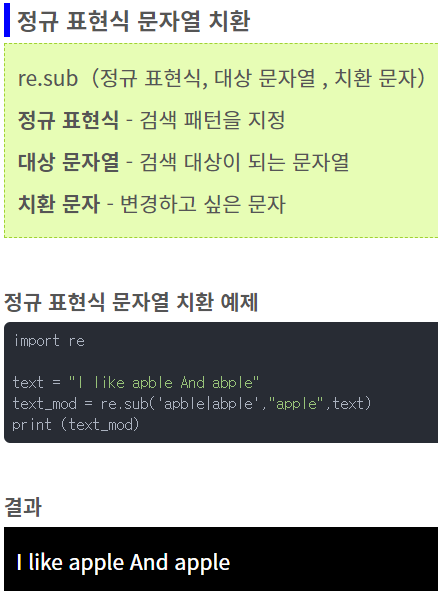

In [ ]:
#model input output tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)
dls.show_batch(max_n=2)

,text,text_
0,"따스한 햇살이 내려앉은 개울가 덤불 숲에서, 어미오리가 따스한 햇살이 내려앉은 개울가 덤불 숲에서, 어미오리가 알을 품고 있었어요. 톡! 톡! 알에 금이 가더니, 빠직 빠지직! 아기오리들이 하나둘 고개를 내밀었어요. 꽥꽥! 꽥꽥! 마지막으로 가장 커다란 알 하나만 남았어요. 어미 오리는 다시 알을 품고 기다렸지요. 얼마나 지났을까요. 톡! 마침내 알에 금이 가더니, 빠지직! 껍질을 깨고 아기오리가 고개를 쑥 내밀었어요. 어머나! 어미오리는 그만 깜짝 놀랐어요. 너무나 볼품 없게 생긴 미운 아기오리였거든요. 어떻게 저런 아기가 나왔을까?’ 어미오리는 눈살을 찌푸리며 고개를 갸우뚱했어요. 맑고 화창한 여름날, 어미오리는 새끼들을 데리고 개울로 갔어요. 첨벙! 어미오리가 물 속으로 뛰어들자 아기오리들도 줄지어, 첨벙첨벙! 미운 아기오리도 조심스레 물 속으로 들어갔지요. 넌 따라오지 마! 너랑 같이 있으면 다른 오리들이 놀린단 말이야! 언니 오리들은 미운","스한 햇살이 내려앉은 개울가 덤불 숲에서, 어미오리가 따스한 햇살이 내려앉은 개울가 덤불 숲에서, 어미오리가 알을 품고 있었어요. 톡! 톡! 알에 금이 가더니, 빠직 빠지직! 아기오리들이 하나둘 고개를 내밀었어요. 꽥꽥! 꽥꽥! 마지막으로 가장 커다란 알 하나만 남았어요. 어미 오리는 다시 알을 품고 기다렸지요. 얼마나 지났을까요. 톡! 마침내 알에 금이 가더니, 빠지직! 껍질을 깨고 아기오리가 고개를 쑥 내밀었어요. 어머나! 어미오리는 그만 깜짝 놀랐어요. 너무나 볼품 없게 생긴 미운 아기오리였거든요. 어떻게 저런 아기가 나왔을까?’ 어미오리는 눈살을 찌푸리며 고개를 갸우뚱했어요. 맑고 화창한 여름날, 어미오리는 새끼들을 데리고 개울로 갔어요. 첨벙! 어미오리가 물 속으로 뛰어들자 아기오리들도 줄지어, 첨벙첨벙! 미운 아기오리도 조심스레 물 속으로 들어갔지요. 넌 따라오지 마! 너랑 같이 있으면 다른 오리들이 놀린단 말이야! 언니 오리들은 미운 아기"
1,"치는 봄이 오면 하고 싶은 일 을 하나하나 다 정해 놓았어요. 그래서 당장 그 일을 해 보려고 기운차게 집을 나섰답니다. 토끼풀 밭까지 왔을 때, 고슴도치는 갑자기 걸음을 멈추었어요. 잠깐, 봄이 오면 하고 싶은 일 이 뭐였더라? 너무 오랫동안 잠을 자는 바람에 중요한 일을 모두 잊어버린 거에요. 하지만 고슴도치는 끙끙대며 고민하지 않았어요. 그래, 데굴데굴 구르는 거였는지도 몰라. 그러고는 따뜻한 풀밭 위를 데굴데굴 굴러보았어요. 아, 기분 좋아. 하지만 이것은 아니었던 것 같아. 고슴도치는 낙엽이나 돌멩이를 뒤집어 무당벌레를 찾았어요. 얘들아, 빨리 일어나! 벌써 봄이 왔단 말이야. 하하, 재밌겠다! 하지만 이것도 아닌거 같아. 고슴도치는 가장 먼저 열린 딸기를 따 먹었어요. 아직 푸른 풋 딸기는 무지무지 시큼했어요. 어유, 이것도 아닌가 봐. 다음으로 고슴도치가 찾아간 곳은 시내였어요. 차갑겠는걸. 그래도 고슴도치는 시냇물에 발을 살짝 담가 보았어요. 앗 차가워!","봄이 오면 하고 싶은 일 을 하나하나 다 정해 놓았어요. 그래서 당장 그 일을 해 보려고 기운차게 집을 나섰답니다. 토끼풀 밭까지 왔을 때, 고슴도치는 갑자기 걸음을 멈추었어요. 잠깐, 봄이 오면 하고 싶은 일 이 뭐였더라? 너무 오랫동안 잠을 자는 바람에 중요한 일을 모두 잊어버린 거에요. 하지만 고슴도치는 끙끙대며 고민하지 않았어요. 그래, 데굴데굴 구르는 거였는지도 몰라. 그러고는 따뜻한 풀밭 위를 데굴데굴 굴러보았어요. 아, 기분 좋아. 하지만 이것은 아니었던 것 같아. 고슴도치는 낙엽이나 돌멩이를 뒤집어 무당벌레를 찾았어요. 얘들아, 빨리 일어나! 벌써 봄이 왔단 말이야. 하하, 재밌겠다! 하지만 이것도 아닌거 같아. 고슴도치는 가장 먼저 열린 딸기를 따 먹었어요. 아직 푸른 풋 딸기는 무지무지 시큼했어요. 어유, 이것도 아닌가 봐. 다음으로 고슴도치가 찾아간 곳은 시내였어요. 차갑겠는걸. 그래도 고슴도치는 시냇물에 발을 살짝 담가 보았어요. 앗 차가워! 역시"


SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.17378008365631104)


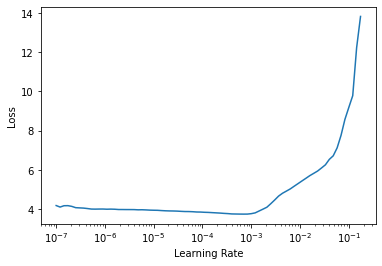

In [ ]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]
        
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr=learn.lr_find()  # 여기가 시간 오래걸리는 부분
print(lr)

fit_one_cycle() 과 fine_tune() 의 차이
[링크 참고](https://forums.fast.ai/t/fine-tune-vs-fit-one-cycle/66029/5)

In [ ]:
learn.fit_one_cycle(5,1e-4) 

epoch,train_loss,valid_loss,perplexity,time
0,3.479925,3.091306,22.005808,02:25
1,2.656511,2.145760,8.548532,02:25
2,1.764689,1.405710,4.078423,02:25
3,1.149668,1.044764,2.842727,02:25
4,0.818959,0.940409,2.561028,02:25


In [ ]:
prompt="빨간망토는 오두막 문을 "
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
sentence=tokenizer.decode(preds[0].cpu().numpy())
sentence

'빨간망토는 오두막 문을 켰어요. 그러자 여자가 말했지요! 난쟁이들이 너무도 너절씨가 대답했다. 하지만 그 때렸습니다. 그리고 그는 창문이 뚫고서 소리쳤는데. 라며 그녀가 물었습니다? 아아, 저를 느꼈지만...... 어머, 이런 세상에... 우리가 왜 이젠 정말이지 뭐예요, 그럼 당장 가엾은 소녀는 거야 할 때마다 새엄마가 아니라 여자마법사가 생각과는 좀 봐라면, 네 머리카락을하고 싶어 했는지 안 돼봐라, 내다보니까진 않으라며 재채기 시작하세례식한 다음 날'

In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,perplexity,time
0,5.120546,6.872829,965.676575,02:25


epoch,train_loss,valid_loss,perplexity,time
0,5.871031,5.847112,346.232910,02:25
1,4.953121,4.903879,134.811722,02:25
2,4.128734,4.358807,78.163834,02:25


In [ ]:
prompt="빨간망토는 오두막 문을 "
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
sentence=tokenizer.decode(preds[0].cpu().numpy())
sentence

'빨간망토는 오두막 문을 켰어요. 그러자 여자가 말했지요! 난쟁이들이 너무도 너절씨가 대답했다. 하지만 그 때렸습니다. 그리고 그는 창문이 뚫고서 소리쳤는데. 라며 그녀가 물었습니다? 아아, 저를 느꼈지만...... 어머, 이런 세상에... 우리가 왜 이젠 정말이지 뭐예요, 그럼 당장 가엾은 소녀는 거야 할 때마다 새엄마가 아니라 여자마법사가 생각과는 좀 봐라면, 네 머리카락을하고 싶어 했는지 안 돼봐라, 내다보니까진 않으라며 재채기 시작하세례식한 다음 날'

In [ ]:
learn.model.save_pretrained("drive/My Drive/Colab Notebooks/a1/novel1_backup")  #모델 저장

## **맞춤법 검사 (Py-Hanspell)**

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-dw0j_q9j
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-dw0j_q9j
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=d6d556fb7c676539b5c19b6d841be48b55059e0a4d859285405a76669cc26898
  Stored in directory: /tmp/pip-ephem-wheel-cache-r000ln57/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [ ]:
spelled_sent = spell_checker.check("빨간망토는 오두막 문을 쾅 닫고 들어가 버렸어요. 할머니는 그 모습을 보고 깔깔거리며 웃었지요.. 그때, 커다란 늑대가 부엌문을 두드리며 소리쳤답니다.. 내 마누라는 하느님처럼 되길 원해. 라고 말했죠... 하지만 그녀는 대답하길, 난 신이 되고 싶거든 당신을 위해 이 집을 다시 찾아올 거야라고 하더군요, 그래서 일단 돌아갓는데 어쨌든 이번 일로 그녀의 얼굴에 웃음꽃이 활짝 피게 되었단다. 마녀씨는 그녀가 있는 곳까지 올라가서 방금 막 숲에서 벗어나 집으로 돌아왔습니다. 그리고 곧장 집 앞에 서 있던 돌로 된 큰 물")

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

빨간 망토는 오두막 문을 쾅 닫고 들어가 버렸어요. 할머니는 그 모습을 보고 깔깔거리며 웃었지요.. 그때, 커다란 늑대가 부엌문을 두드리며 소리쳤답니다.. 내 마누라는 하느님처럼 되길 원해.라고 말했죠... 하지만 그녀는 대답하길, 난 신이 되고 싶거든 당신을 위해 이 집을 다시 찾아올 거야라고 하더군요, 그래서 일단 돌아갔는데 어쨌든 이번 일로 그녀의 얼굴에 웃음꽃이 활짝 피게 되었단다. 마녀 세는 그녀가 있는 곳까지 올라가서 방금 막 숲에서 벗어나 집으로 돌아왔습니다. 그리고 곧장 집 앞에 서 있던 돌로 된 큰 물
